In [28]:
#LIBRARIES
import pandas as pd
import re
import numpy as np
from tqdm import tqdm
import math 
## FUZZY
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

## nomalice parameters
from unidecode import unidecode

import spacy  # For preprocessing
from scipy import spatial
from time import time  # To time our operations
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import pylab as P

In [2]:
DF_JOB_H = pd.read_excel("final_db_jh_clean_endboot.xlsx")


In [3]:
DF_JOB_H["job_history_clean"]



0      [{'job_title': ' comedienne', 'start': '2012',...
1      [{'job_title': ' independent dealer', 'start':...
2      [{'job_title': ' palliative care cancer clown'...
3      [{'job_title': ' actress'}, {'job_title': ' fr...
4      [{'job_title': ' web developer', 'start': '201...
                             ...                        
384    [{'job_title': ' policy officer advisor qualit...
385    [{'job_title': ' angularjs asp net web project...
386    [{'job_title': ' ceo founder', 'start': '2014'...
387    [{'job_title': ' specialist child adolescent p...
388    [{'job_title': ' web developer', 'start': '201...
Name: job_history_clean, Length: 389, dtype: object

In [4]:
## object maker
def stringToObject(DataFrame):
    #SEPARANDO LOS STRINGS DE CADA TRABAJO

    L = []

    for i in DataFrame.job_history_clean:
        l = str(i).split("},") #convertir en string el job history del individuo y crear lista para separar cada formación
        k = [] #Lista donde se almacenara cada formación x del individuo i
        for job in l: #para cada trabajo
            job = job.replace("[", "").replace("]", "") + "}" #separelos y conviertalas en diccionarios
            k.append(job) #añadalas a la lista de jobs
        L.append(k) 
    #EXTRAER DE MANERA ORDENADA EL JOB HISTORY, LA FECHA DE TERMINACIÓN Y COMIENZO
    K = [] 

    for individuo in tqdm(L): 

        educacion_ind = [] 

        for ins in individuo: 
            print(ins, type(ins))
            ins = ins.replace('"', "'")

            c = {}

            #EXTRAER JOB-TITLE
            if ( len(re.findall("'job_title': '.*?'", ins)) ) > 0:
                c["job_title"] =  re.findall("'job_title': '.*?'", ins)[0].replace("'job_title': ", "").replace("'", "")
                c["job_title"] = str(c["job_title"])
                # c["job_title"] = cleaning(c["job_title"])

            #EXTRAER INICIO
            if ( len(re.findall("'start': '.*?'", ins)) ) > 0:
                c["start"] = re.findall("'start': '.*?'", ins)[0].replace("'start': ", "").replace("'", "")
                c["start"] = int(c["start"][::-1][0:4][::-1]) #SOLO CONSERVAR EL AÑO 

            #EXTRAER FINALIZACIÓN
            if ( len(re.findall("'end': '.*?'", ins)) ) > 0:
                c["end"] = re.findall("'end': '.*?'", ins)[0].replace("'end': ", "").replace("'", "")
                c["end"] = int(c["end"][::-1][0:4][::-1]) #SOLO CONSERVAR EL AÑO

            educacion_ind.append(c) #añado cada formación a la lista de sus educaciones

        K.append(educacion_ind) #añado la educación de cada individuo a una lista general
    return K

    

In [5]:
result = stringToObject(DF_JOB_H)
print(result)


 ' video scenographer', 'start': 2011, 'end': 2011}, {'job_title': ' intern entertainment activities unit teatro', 'start': 2010, 'end': 2011}, {'job_title': ' sound engineer', 'start': 2011, 'end': 2011}], [{'job_title': ' gastronomic', 'start': 2005}, {'job_title': ' private security', 'start': 2013, 'end': 2014}, {'job_title': ' charge', 'start': 1991, 'end': 1998}], [{'job_title': ' ogc operational planning support', 'start': 2008}, {'job_title': ' beautician owner', 'start': 1989, 'end': 2008}, {'job_title': ' product supervisor', 'start': 1985, 'end': 1990}, {'job_title': ' secr employee dir secr', 'start': 1980, 'end': 1985}], [{'job_title': ' director nursing', 'start': 2016}, {'job_title': ' deputy director critical area', 'start': 2012}, {'job_title': ' head internal medicine', 'start': 2000}], [{'job_title': ' co founder', 'start': 2016}, {'job_title': ' founding partner', 'start': 2013, 'end': 2015}, {'job_title': ' strategy director', 'start': 2012, 'end': 2015}, {'job_tit

In [6]:
type(result[0][0]["start"])

int

In [7]:
len(result)

389

In [8]:

embeddings_dict = {}
# vectors dimention
DIMENTION_DIC = 300
# 6 billions words
#with open("glove.6B."+str(DIMENTION_DIC)+"d.txt", 'r', encoding="utf-8") as f:
# 42 Billion words
with open("glove.42B."+str(DIMENTION_DIC)+"d.txt", 'r', encoding="utf-8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        print(word)
        vector = np.asarray(values[1:], "float32")
        embeddings_dict[word] = vector

        

ney/redi-meds
stalwartuk
st-amant
stamp-size
stanchorage
s.t.a.n.d.
standord
starfox64
starle
starmind
star-san
starselite
starsports
starspow
starsshineonme
start/continue
start.html
starthtml
star-type
starvox
starwagon
stasso
state10
statec
statementlicense
state.now
state-reported
states10/10/2012
statesquick
statesthere
states.washington
state_type
stateview
stathams
station/bryan
stationthis
statkevich
statsanswersboardvideos
statti
stay-awake
staybeautiful
stboise
std100
stduluth
steamfunk
steapon
steece
steelers/ravens
steelroots
stefanibags.com
steinhour
stellenbosh
step.if
stepkother
stepo
stepsjoincontact
step-step
stepups
steri-fab
sterioids
sterlinglogin
sternn
steroided
stevn
stgc
sthd
stnto
stock11
stock.estimated
stockfinster
stockholme
stockpickers
stockpiler
stocks.com
stockwarning
stocs
stokeham
stoke-on
stolder
stommelen
stone-covered
stooop
stopgame
stop/limit
storandt
storesbusinesses
stormclan
störmer
storm-relative
storyfebruary
story?follow
storywriters
stossel

In [14]:
## ordena la spalabras dependiendo de la distancia euclidiana en el n-space
def find_closest_embeddings(embedding):
    return sorted(embeddings_dict.keys(), key=lambda word: spatial.distance.euclidean(embeddings_dict[word], embedding))

## method to get word/vector from dictionary
def getVectorWord(dictionary, word):
    if word in dictionary:
        return dictionary[word]
    else :
        return np.zeros(DIMENTION_DIC)


In [15]:
DF_JOB_H["end_boot"][200]

2015

In [16]:
## tranform profiles to vectors
profilesVectors = []
profilesVectorPlain = []
for index in range(0,len(result)):
    job_history_prof = result[index]
    boot_year = DF_JOB_H["end_boot"][index]
    boot_year = int(boot_year) if not type(boot_year) ==str  and not math.isnan(boot_year)  else float("nan")
    total_jobs = len(job_history_prof)
    job_vectors = []
    print(type(boot_year)== str,boot_year, )
    for i in range(0,total_jobs):
        if "start" in job_history_prof[i] and "job_title" in job_history_prof[i] and boot_year and not math.isnan(boot_year) and not type(boot_year) ==str and job_history_prof[i]["start"]>=int(boot_year):
            
            job_title = job_history_prof[i]["job_title"]
            print(job_title,len(job_title))
            nVectors = [np.zeros(DIMENTION_DIC)]
            if len(job_title) > 0:
                nVectors  = [ getVectorWord(embeddings_dict,word) for word in job_title.split()]
            sumVector = np.add.reduce(nVectors)
            job_vectors.append(sumVector)
            profilesVectorPlain.append(sumVector)
        else:
            profilesVectorPlain.append(np.zeros(DIMENTION_DIC))
            job_vectors.append(None)
    profilesVectors.append(job_vectors)



eographer 24
 specialty choreographer stunt coordinator 42
 celebrity judge 16
 movement specialist 20
 celebrity judge 16
 specialty choreographer stunt coordinator artistic cast consultant 67
 action choreographer stunt coordinator 39
 celebrity judge 16
 choreographer 14
 comedy stunt choreography performance 38
 aerial stunt work 18
 action choreographer stunt coordinator nd unit director 56
 aerial choreographer performance aerial concept 48
 aerial choreographer stunt coordinator 39
 acrobatics choreographer stunt coordinator 43
 aerial choreographer 21
 acrobatics choreographer stunt coordinator 43
 carnival choreographer 23
 director 9
 acrobatics choreographer 25
 circus concept performance 27
 movement performance choreography concept 42
 circus choreographer 21
 circus choreographer 21
 aerial creation performance 28
 choreography training performance 34
 cast member 12
 guest performer 16
 cast member assistant choreographer director 45
False 2016
 ad operations manager med

In [23]:
len(profilesVectorPlain[0])

300

In [18]:
## number of words needed to pass
MIN_COUNT = 2
## validates if is word related
def validator(relatedWords, words):
    isRelated = False
    count = 0
    for word in words:
        if word in relatedWords:
            count+=1
        if count >= MIN_COUNT: 
            return True
    if count >= MIN_COUNT: 
        return True
    else:
        return False

 


In [25]:
print(find_closest_embeddings(profilesVectorPlain[1])[:9])

['director', 'assistant', 'manager', 'second', 'executive', 'department', 'first', 'associate', 'senior']


In [26]:
TOTAL_CLUSTERS = 12
#TOTAL_CLUSTERS = 4
dicC = {}
clusterTotal = np.zeros(len(profilesVectorPlain))

related_words = ["software","development","engineer","web","developers","developer","engineering","technical","java","computer","microsoft","technology","programmer"]
for clust in range(2, TOTAL_CLUSTERS+1):
    kmeans = KMeans(n_clusters=clust, random_state=0).fit(profilesVectorPlain)
    labels = kmeans.labels_
    relatedArray = []
    for index in range(0,len(kmeans.cluster_centers_)):
        words = find_closest_embeddings(kmeans.cluster_centers_[index])[:7]
        related = validator(related_words, words)
        print(index,related," - ",words)
        relatedArray.append(related)
    print(len(relatedArray),clust, len(clusterTotal))
    for proIndex in range(0,len(labels)):
        label = labels[proIndex]
        isRelated = relatedArray[label]
        if isRelated==True:
            print("isRelated")
            prev = clusterTotal[proIndex]
            clusterTotal[proIndex] = prev + 1
            print(prev,clusterTotal[proIndex])
    print("------------------------------------------\n")

 2.0
isRelated
1.0 2.0
isRelated
1.0 2.0
isRelated
1.0 2.0
isRelated
1.0 2.0
isRelated
1.0 2.0
isRelated
1.0 2.0
isRelated
1.0 2.0
isRelated
1.0 2.0
isRelated
1.0 2.0
isRelated
1.0 2.0
isRelated
1.0 2.0
isRelated
1.0 2.0
isRelated
1.0 2.0
isRelated
1.0 2.0
isRelated
1.0 2.0
isRelated
1.0 2.0
isRelated
1.0 2.0
isRelated
1.0 2.0
isRelated
1.0 2.0
isRelated
1.0 2.0
isRelated
1.0 2.0
isRelated
1.0 2.0
isRelated
1.0 2.0
isRelated
1.0 2.0
isRelated
1.0 2.0
isRelated
1.0 2.0
isRelated
1.0 2.0
isRelated
1.0 2.0
isRelated
1.0 2.0
isRelated
1.0 2.0
isRelated
1.0 2.0
isRelated
1.0 2.0
isRelated
1.0 2.0
isRelated
1.0 2.0
isRelated
1.0 2.0
isRelated
1.0 2.0
isRelated
1.0 2.0
isRelated
1.0 2.0
isRelated
1.0 2.0
isRelated
1.0 2.0
isRelated
1.0 2.0
isRelated
1.0 2.0
isRelated
0.0 1.0
isRelated
1.0 2.0
isRelated
1.0 2.0
isRelated
1.0 2.0
isRelated
1.0 2.0
isRelated
1.0 2.0
isRelated
1.0 2.0
isRelated
1.0 2.0
isRelated
1.0 2.0
isRelated
1.0 2.0
isRelated
1.0 2.0
isRelated
1.0 2.0
isRelated
1.0 2.0
isRel

## max number in any job is 9, 

In [27]:
print(np.max(clusterTotal))

9.0


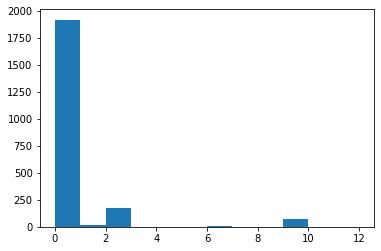

In [32]:

n, bins, patches = P.hist(clusterTotal,bins=[0,1,2,3,4,5,6,7,8,9,10,11,12])
P.show()

In [17]:
len(clusterTotal)

2186

In [20]:
len(profilesVectors[0])

2

## to group back the data


In [37]:
totalIndex = 0
finalDic = {}
finalDic["HAD_RELATED"] = []
finalDic["POSITIVE_JOBS"] = []
finalDic["POSIBLE_JOBS"] = []
for profile in profilesVectors:
    lenP = len(profile)
    #print("total JOBs", lenP)
    totalPosJobs = 0
    possibleJobs = 0
    hadRealted = False
    ## se recorre el array de jobs para este perfil
    for jobI in range(0,lenP):
        job = profile[jobI]
        print(jobI,type(job) )
        if  type(job) == np.ndarray : 
            countSingleJob = clusterTotal[totalIndex]
            print(countSingleJob)
            possibleJobs+=1
            if countSingleJob>4:
                hadRealted = True
                totalPosJobs+=1
            totalIndex+=1
        else:
            totalIndex+=1
    finalDic["HAD_RELATED"].append(hadRealted)
    finalDic["POSITIVE_JOBS"].append(totalPosJobs)
    finalDic["POSIBLE_JOBS"] .append(possibleJobs)
print(len(clusterTotal),totalIndex,finalDic)


neType'>
22 <class 'NoneType'>
23 <class 'NoneType'>
24 <class 'NoneType'>
25 <class 'NoneType'>
26 <class 'NoneType'>
0 <class 'numpy.ndarray'>
1.0
1 <class 'numpy.ndarray'>
9.0
2 <class 'NoneType'>
3 <class 'NoneType'>
4 <class 'NoneType'>
5 <class 'NoneType'>
6 <class 'NoneType'>
7 <class 'NoneType'>
8 <class 'NoneType'>
0 <class 'NoneType'>
1 <class 'NoneType'>
2 <class 'NoneType'>
3 <class 'NoneType'>
4 <class 'NoneType'>
0 <class 'numpy.ndarray'>
2.0
1 <class 'numpy.ndarray'>
9.0
2 <class 'numpy.ndarray'>
2.0
3 <class 'numpy.ndarray'>
2.0
4 <class 'numpy.ndarray'>
2.0
5 <class 'numpy.ndarray'>
2.0
6 <class 'numpy.ndarray'>
2.0
7 <class 'numpy.ndarray'>
2.0
8 <class 'numpy.ndarray'>
2.0
9 <class 'numpy.ndarray'>
2.0
10 <class 'NoneType'>
11 <class 'NoneType'>
0 <class 'NoneType'>
1 <class 'NoneType'>
2 <class 'NoneType'>
3 <class 'NoneType'>
4 <class 'NoneType'>
5 <class 'NoneType'>
6 <class 'NoneType'>
7 <class 'NoneType'>
0 <class 'NoneType'>
1 <class 'NoneType'>
2 <class 'NoneT

In [38]:

JOB_HIST_CLUS_DF = pd.DataFrame(finalDic)
JOB_HIST_CLUS_DF.to_excel("count_history_index.xlsx",index=False)
print(JOB_HIST_CLUS_DF, JOB_HIST_CLUS_DF.shape)

     HAD_RELATED  POSITIVE_JOBS  POSIBLE_JOBS
0          False              0             1
1          False              0             0
2          False              0             0
3          False              0             0
4           True              2             2
..           ...            ...           ...
384        False              0             0
385        False              0             0
386        False              0             0
387        False              0             0
388        False              0             0

[389 rows x 3 columns] (389, 3)
